# Classification Analysis
## Import Pakages and Data + Data Investigation

In [125]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier



ModuleNotFoundError: No module named 'ggplot'

In [68]:
#Read data and drop rows with null
data = pd.read_csv('data/breast_cancer.csv')
data['Bl.cromatin']=data['Bl.cromatin'].astype('category',copy=False)
data['Bare.nuclei']=data['Bare.nuclei'].astype('category',copy=False)
data['Normal.nucleoli']=data['Normal.nucleoli'].astype('category',copy=False)
data['Mitoses']=data['Mitoses'].astype('category',copy=False)
data = data.dropna()
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [75]:
nom_vars = data.columns[data.dtypes == 'category']
nom_vars_df = data[nom_vars]
nom_vars_df = pd.get_dummies(nom_vars_df, prefix = nom_vars, drop_first = True)
data_new = pd.concat([data.drop(nom_vars, axis = 1), nom_vars_df], axis = 1)

In [76]:
data_new.head(30)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Class,Bare.nuclei_2.0,Bare.nuclei_3.0,Bare.nuclei_4.0,...,Normal.nucleoli_9,Normal.nucleoli_10,Mitoses_2,Mitoses_3,Mitoses_4,Mitoses_5,Mitoses_6,Mitoses_7,Mitoses_8,Mitoses_10
0,1000025,5,1,1,1,2,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002945,5,4,4,5,7,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1015425,3,1,1,1,2,benign,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1016277,6,8,8,1,3,benign,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1017023,4,1,1,3,2,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1017122,8,10,10,8,7,malignant,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1018099,1,1,1,1,2,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1018561,2,1,2,1,2,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1033078,2,1,1,1,2,benign,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1033078,4,2,1,1,2,benign,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# split into X and y
y = data_new['Class']
X = data_new.drop(['Id', 'Class'], axis=1)

#Impute Missing Values
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(X)
transformed_X = imp.transform(X)

In [71]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20, random_state=11)
[y_train.size, y_test.size]

[546, 137]

## Boosting
### Adaptive Boosting

In [79]:
#Fit ada boost for plethora of parameters to find best ones
scores_ada = []
for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
    for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
        clf_a = AdaBoostClassifier(n_estimators=n, learning_rate=learning, random_state=0)
        scores_a = cross_val_score(clf_a, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
        score = scores_a.mean()
        scores_ada.append([score, learning, n])

In [80]:
#look at average CV scores for each parameter subset
scores_ada_df = pd.DataFrame(scores_ada)
scores_ada_df.columns = ['auc', 'learn_rate', 'n_estimators']
scores_ada_df

,auc,learn_rate,n_estimators
0,0.894562,1.00,1
1,0.935733,1.00,2
2,0.968596,1.00,4
3,0.977113,1.00,8
4,0.981595,1.00,16
5,0.983492,1.00,32
6,0.981619,1.00,64
7,0.981900,1.00,100
8,0.979076,1.00,200
9,0.894562,0.50,1


In [153]:
#Make plots too see how different paramteres affect score
learn_avg = scores_ada_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_ada_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','auc']]
learn_n_avg = scores_ada_df.groupby(['learn_rate','n_estimators'], as_index=False).mean()[['learn_rate','n_estimators','auc']]

Text(0.5, 1.0, 'AUC for Different Learning Rate')

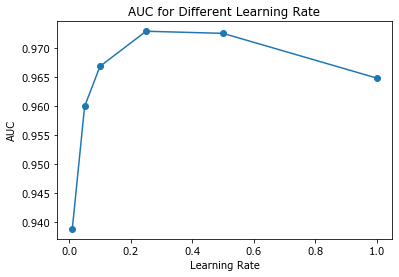

In [82]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

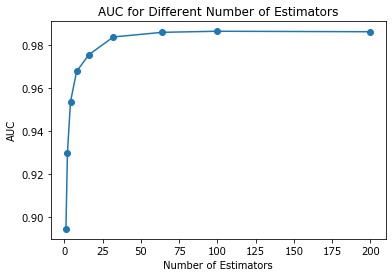

In [83]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

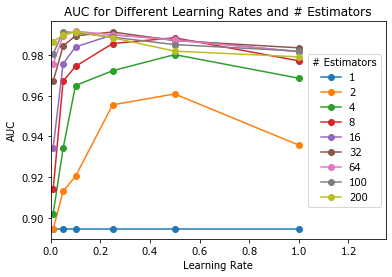

In [154]:
for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    plt_data = learn_n_avg[learn_n_avg['n_estimators'] == n]
    plt.plot(plt_data.iloc[:,0], plt_data.iloc[:,2], marker='o', label=n)
plt.xlim(0,1.35)
plt.legend(loc='right', title = '# Estimators')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rates and # Estimators")
plt.show()

In [84]:
#find best fit
max_auc = scores_ada_df['auc'].max()
best_fit = scores_ada_df.loc[scores_ada_df['auc'] == max_auc]
best_fit

,auc,learn_rate,n_estimators
33,0.991647,0.1,64


In [85]:
#score best fit against test data
clf_a = AdaBoostClassifier(n_estimators=64, learning_rate=.1, random_state=0)
clf_a.fit(X_train, y_train)
score = clf_a.score(X_test,y_test)
score

0.9781021897810219

In [106]:
ada_predictions = clf_a.predict(X_test)
results = pd.DataFrame([ada_predictions, y_test]).transpose()
results.columns = ['Predictions', 'Actual']
table = results.groupby(["Predictions", "Actual"]).size()
print(table)



Predictions  Actual   
benign       benign       85
             malignant     2
malignant    benign        1
             malignant    49
dtype: int64


### Gradient Boosting

In [107]:
#Fit gradient boosting for a plethora of parameter subsets to find best subset
scores_grad = []
for depth in [1,2,3,4,5]:
    for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
        for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
            clf_g = GradientBoostingClassifier(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
            scores_g = cross_val_score(clf_g, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
            score = scores_g.mean()
            scores_grad.append([score,depth, learning, n])

In [108]:
#look at averages
scores_grad_df = pd.DataFrame(scores_grad)
scores_grad_df.columns = ['auc','depth', 'learn_rate', 'n_estimators']
scores_grad_df

,auc,depth,learn_rate,n_estimators
0,0.894562,1,1.00,1
1,0.931542,1,1.00,2
2,0.970732,1,1.00,4
3,0.976114,1,1.00,8
4,0.981410,1,1.00,16
5,0.980849,1,1.00,32
6,0.985512,1,1.00,64
7,0.984428,1,1.00,100
8,0.982215,1,1.00,200
9,0.894562,1,0.50,1


In [122]:
#make plots to investigate
depth_avg = scores_grad_df.groupby('depth', as_index=False).mean()[['depth','auc']]
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_grad_df.groupby('n_estimators', as_index=False).mean()[['n_estimators','auc']]

learn_n_avg = scores_grad_df.groupby(['learn_rate','n_estimators'], as_index=False).mean()[['learn_rate','n_estimators','auc']]


,learn_rate,n_estimators,auc
0,0.01,1,0.930198
1,0.01,2,0.932184
2,0.01,4,0.934698
3,0.01,8,0.941040
4,0.01,16,0.944176
5,0.01,32,0.958615
6,0.01,64,0.968099
7,0.01,100,0.975161
8,0.01,200,0.982442
9,0.05,1,0.932685


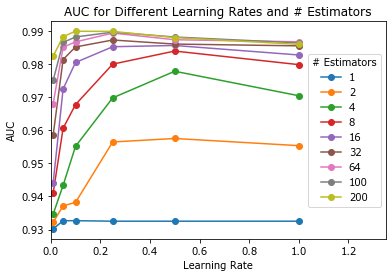

In [150]:
for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
    plt_data = learn_n_avg[learn_n_avg['n_estimators'] == n]
    plt.plot(plt_data.iloc[:,0], plt_data.iloc[:,2], marker='o', label=n)
plt.xlim(0,1.35)
plt.legend(loc='right', title = '# Estimators')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rates and # Estimators")
plt.show()

In [110]:
print(depth_avg)
print(learn_avg)
print(n_avg)

   depth       auc
0      1  0.960596
1      2  0.970697
2      3  0.973303
3      4  0.971502
4      5  0.967656
   learn_rate       auc
0        0.01  0.951846
1        0.05  0.965319
2        0.10  0.969387
3        0.25  0.975606
4        0.50  0.976368
5        1.00  0.973978
   n_estimators       auc
0             1  0.932193
1             2  0.946162
2             4  0.958562
3             8  0.968885
4            16  0.975156
5            32  0.980698
6            64  0.983925
7           100  0.985723
8           200  0.987453


Text(0.5, 1.0, 'AUC for Different Tree Depths')

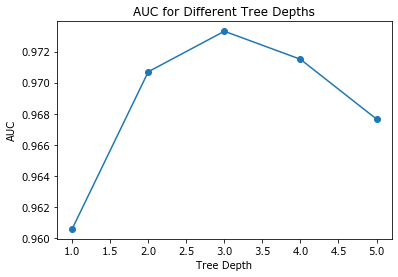

In [149]:
plt.plot(depth_avg.iloc[:,0], depth_avg.iloc[:,1], marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("AUC")
plt.title("AUC for Different Tree Depths")

Text(0.5, 1.0, 'AUC for Different Learning Rate')

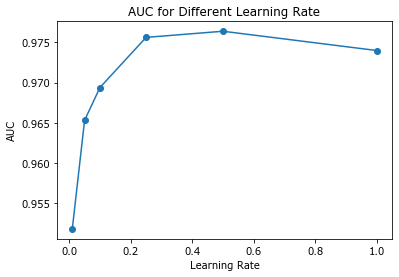

In [112]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

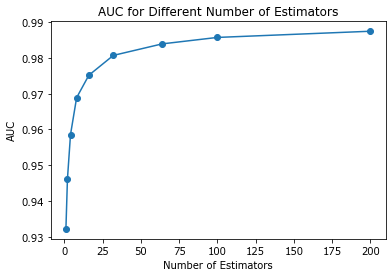

In [113]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

In [116]:
#find best subset
max_auc = scores_grad_df['auc'].max()
best_fit = scores_grad_df.loc[scores_grad_df['auc'] == max_auc]
best_fit

,auc,depth,learn_rate,n_estimators
134,0.991689,3,0.25,200


In [117]:
#score test data on best subset 
clf_g = GradientBoostingClassifier(n_estimators=200, learning_rate=.25, max_depth=3, random_state=0)
clf_g.fit(X_train, y_train)
score = clf_g.score(X_test,y_test)
score

0.9927007299270073

In [118]:
ada_predictions = clf_g.predict(X_test)
results = pd.DataFrame([ada_predictions, y_test]).transpose()
results.columns = ['Predictions', 'Actual']
table = results.groupby(["Predictions", "Actual"]).size()
print(table)

Predictions  Actual   
benign       benign       85
malignant    benign        1
             malignant    51
dtype: int64
